In [47]:
from datascience import *
import numpy as np

In [48]:
#Import Tables
Init_table = Table.read_table('house_vote.csv')
table_train = Table.read_table('house_train.csv')
table_test = Table.read_table('house_test_without_label.csv')

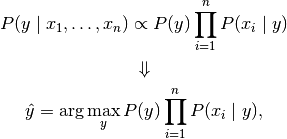

In the lab example y represents whether someone is a republican or democrat and x_i represents their vote for some proposal i

## Calculate The Prior 
$P(Y)$

The prior in this example will be the probability that someone is a Republican or Democrat. This probability is equal to the proportion of each category, i.e probability of someone being a democrat is (# of democrats) / (# of congresspeople) 

In [49]:
rep_table = table_train.where('V1','republican')
num_rep = rep_table.num_rows
dem_table = table_train.where('V1','democrat')
num_dem = dem_table.num_rows
Y = [(num_rep / table_train.num_rows), (num_dem / table_train.num_rows)]
Y

[0.3834355828220859, 0.6165644171779141]

## Calculate the conditional likelihood 
$p(X_i \mid Y)$

Example: The conditional likelihood that someone 'Yes' on vote 1 given they are Republican equals (# Republicans that voted 'Yes' on vote 1) / (# total Republicans)

In [50]:
#First create the matrix in which we will put in the values
X_rep = np.zeros(((table_train.num_columns-2),2))
X_dem = np.zeros(((table_train.num_columns-2),2))

#Each row will correspond with proposal
#Each column will correspond to the vote
    #Ex. The third row and second column of X_rep contains the probability that vote='No' for vote 3 given Republican
for i in range(1,(len(X_rep) + 1)): #For every vote
    X_rep[(i-1),0] = (sum(rep_table[i+1] == 'y')) / (rep_table.num_rows) #(#of Republicans that voted yes) / (#Republicans) 
    X_rep[(i-1),1] = (sum(rep_table[i+1] == 'n')) / (rep_table.num_rows) #(#of Republicans that voted no) / (#Republicans)
    X_rep[(i-1),] = X_rep[(i-1),] / sum(X_rep[(i-1),])
    X_dem[(i-1),0] = (sum(dem_table[i+1] == 'y')) / (dem_table.num_rows) #(#of Democrats that voted yes) / (#Democrats)
    X_dem[(i-1),1] = (sum(dem_table[i+1] == 'n')) / (dem_table.num_rows) #(#of Democrats that voted no) / (#Democrats)
    X_dem[(i-1),] = X_dem[(i-1),] / sum(X_dem[(i-1),])
X_rep


array([[ 0.16935484,  0.83064516],
       [ 0.53271028,  0.46728972],
       [ 0.1147541 ,  0.8852459 ],
       [ 0.98373984,  0.01626016],
       [ 0.95934959,  0.04065041],
       [ 0.87804878,  0.12195122],
       [ 0.24793388,  0.75206612],
       [ 0.13675214,  0.86324786],
       [ 0.09756098,  0.90243902],
       [ 0.55284553,  0.44715447],
       [ 0.09166667,  0.90833333],
       [ 0.88695652,  0.11304348],
       [ 0.8559322 ,  0.1440678 ],
       [ 0.99159664,  0.00840336],
       [ 0.09565217,  0.90434783],
       [ 0.63551402,  0.36448598]])

## First testing on training data

In [51]:
#Turn the the training table into a matrix
X_train = np.empty((table_train.num_rows,16))
for i in range(1,table_train.num_rows):
    x = np.asarray(table_train.rows[(i-1)][2:18])
    x[x == 'y'] = 0; x[x == 'n'] = 1
    X_train[(i-1),] = x.astype(np.float)
X_train

array([[  1.,   0.,   1., ...,   0.,   1.,   0.],
       [  1.,   0.,   1., ...,   0.,   1.,  nan],
       [ nan,   0.,   0., ...,   0.,   1.,   1.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   1.,  nan],
       [  1.,   0.,   1., ...,   0.,   1.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

## Calculating the posterior of class given data for train set
$p(Y \mid X_1, X_2, ...)$

Remember that we are using NAIVE  Bayes' Theorem

In [72]:
Y_train = np.zeros((len(X_train),2))

for i in range(1,len(Y_train)): #For every Congressperson
    x = X_train[(i-1),] #Pick a Congressperson
    y_rep = 1 #Start at 1
    y_dem = 1 #Start at 1
    for j in range(1,len(x)): #For every vote
        if ~np.isnan(x[(j-1)]): #Ignore the Nan values
            y_rep *= X_rep[(j-1),x[(j-1)].astype(np.int)] #Multiplying P(vote_j | Republican)
            y_dem *= X_dem[(j-1),x[(j-1)].astype(np.int)] #Calculating P(vote_j | Democrat)
    Y_train[(i-1),0] =  y_rep * Y[0] #Multiply by Prior 
    Y_train[(i-1),1] =  y_dem * Y[1] #Multiply by Prior
    Y_train[(i-1),] = Y_train[(i-1),] / sum(Y_train[(i-1),]) #Optional but nice step which smooths the values by their porportion of each other so that their sum equals 1       
X_train


array([[  1.,   0.,   1., ...,   0.,   1.,   0.],
       [  1.,   0.,   1., ...,   0.,   1.,  nan],
       [ nan,   0.,   0., ...,   0.,   1.,   1.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   1.,  nan],
       [  1.,   0.,   1., ...,   0.,   1.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

## Making predictions 

Now that we have the probability of someone being a Democrat / Republican, we will predict their party using whichever one is higher. Ex. If the probability of someone being a Democrat is 5% and the probability of them being a Republican is 1%, we will predict Democrat

In [53]:
Labels = np.argmax(Y_train,axis = 1)
Labels

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0,

In [54]:
table_train.with_column('Prediction', Labels)

Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Prediction
1,republican,n,y,n,y,y,y,n,n,n,y,nan,y,y,y,n,y,0
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,nan,0
3,democrat,nan,y,y,nan,y,y,n,n,n,n,y,n,y,y,n,n,0
4,democrat,n,y,y,n,nan,y,n,n,n,n,y,n,y,n,n,y,1
5,democrat,y,y,y,n,y,y,n,n,n,n,y,nan,y,y,y,y,1
6,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,1
7,democrat,n,y,n,y,y,y,n,n,n,n,n,n,nan,y,y,y,0
8,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,nan,y,0
9,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
10,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,nan,nan,1


In [55]:
Truth = table_train.columns[1]
Truth[Truth == 'democrat'] = 1 #Change all democrats to be 1
Truth[Truth == 'republican'] = 0 #Change all republicans to be 0
Truth = Truth.astype(np.int)
sum(Labels == Truth) / len(Labels) # Number of matches / size of data

0.92024539877300615

# Test Data

In [56]:
#Put data into Matrix form 
X_test = np.empty((table_test.num_rows,16))
for i in range(1,table_test.num_rows):
    x = np.asarray(table_test.rows[(i-1)][1:17])
    x[x == 'y'] = 0; x[x == 'n'] = 1
    X_test[(i-1),] = x.astype(np.float)
X_test

array([[  0.,   0.,   1., ...,   0.,   1.,   0.],
       [  1.,   0.,   1., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   1.,   1.,   0.],
       ..., 
       [  1.,  nan,   1., ...,   0.,   1.,   0.],
       [  1.,   1.,   1., ...,   0.,   1.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [57]:
#Loading test data into matrix
Y_test = np.zeros((len(X_test),2))

for i in range(1,len(Y_test)):
    x = X_test[(i-1),]
    y_rep = 1
    y_dem = 1
    for j in range(1,len(x)):
        if ~np.isnan(x[(j-1)]):
            y_rep = y_rep * X_rep[(j-1),x[(j-1)].astype(np.int)]
            y_dem = y_dem * X_dem[(j-1),x[(j-1)].astype(np.int)]
    Y_test[(i-1),0] =  y_rep * Y[0]
    Y_test[(i-1),1] =  y_dem * Y[1]
    Y_test[(i-1),] = Y_test[(i-1),] / sum(Y_test[(i-1),])
Y_test

array([[  1.36983070e-04,   9.99863017e-01],
       [  9.99999993e-01,   7.47601131e-09],
       [  4.29895177e-12,   1.00000000e+00],
       [  2.09079122e-11,   1.00000000e+00],
       [  9.99999995e-01,   5.35571400e-09],
       [  1.57427973e-12,   1.00000000e+00],
       [  1.57988757e-13,   1.00000000e+00],
       [  9.96824052e-12,   1.00000000e+00],
       [  7.20409382e-09,   9.99999993e-01],
       [  9.99999937e-01,   6.31759294e-08],
       [  6.74050294e-07,   9.99999326e-01],
       [  1.33753588e-12,   1.00000000e+00],
       [  4.04987038e-10,   1.00000000e+00],
       [  9.99999343e-01,   6.57229459e-07],
       [  9.99998977e-01,   1.02298272e-06],
       [  4.29517136e-07,   9.99999570e-01],
       [  2.65989337e-05,   9.99973401e-01],
       [  9.71261105e-01,   2.87388946e-02],
       [  1.64358369e-12,   1.00000000e+00],
       [  9.99972264e-01,   2.77364354e-05],
       [  9.99999993e-01,   7.46229482e-09],
       [  9.99999944e-01,   5.56141686e-08],
       [  

# Prediction

In [58]:
Labels = np.argmax(Y_test,axis = 1)
Labels

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

In [59]:
table_test.with_column('Prediction', Labels)

Unnamed: 0,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,Prediction
327,y,y,n,y,n,n,y,y,y,n,y,n,n,y,n,y,1
328,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y,0
329,y,y,y,n,n,n,y,y,y,n,y,n,n,n,n,y,1
330,y,nan,y,n,n,y,y,y,y,y,n,n,n,n,y,nan,1
331,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,n,0
332,y,nan,y,n,n,n,y,y,y,n,n,n,n,n,y,nan,1
333,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,nan,1
334,n,n,y,n,n,n,y,y,y,n,n,n,n,n,y,y,1
335,n,y,y,n,n,y,y,y,nan,n,y,y,n,n,y,y,1
336,n,n,n,y,y,y,n,n,n,y,y,y,y,y,n,nan,0


## Testing accuracy

In [62]:
test = Table.read_table('house_test_with_label.csv') #Import answers
Truth = test.columns[1]
Truth[Truth == 'democrat'] = 1
Truth[Truth == 'republican'] = 0
Truth = Truth.astype(np.int)
sum(Labels == Truth) / len(Labels)

0.87155963302752293